In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import json

from utils.dlt import *
from utils.files import FileName
from utils.skeleton_keypoints import *
from utils.motion_visualize_tool import *

In [2]:
with open("cube/subsets.json", "r") as f:
    subsets = json.load(f)

imgpoints = []
for i in ["02", "1", "2", "3", "4"]:
    imgpoints.append(subsets[f"{i}.mp4"])
imgpoints = np.array(imgpoints, dtype=np.float32)

In [3]:
with open("cube/3d_points.json", "r") as f:
    points = json.load(f)
cube_3d = np.array(points["object_point"], dtype=np.float32)
objpoints = np.array([cube_3d for _ in range(len(imgpoints))] , dtype=np.float32)

In [4]:
print(f"imgpoints: {imgpoints.shape}")
print(f"objpoints: {objpoints.shape}")

imgpoints: (5, 8, 2)
objpoints: (5, 8, 3)


In [5]:
cam = 5

p1 = prepare_matrix(imgpoints[0], objpoints[0])
p2 = prepare_matrix(imgpoints[1], objpoints[1])
p3 = prepare_matrix(imgpoints[2], objpoints[2])
p4 = prepare_matrix(imgpoints[3], objpoints[3])
p5 = prepare_matrix(imgpoints[4], objpoints[4])
P = np.array([p1, p2, p3, p4, p5], dtype=np.float32)

cube_array = pose_recon_2c(cam, P, imgpoints)

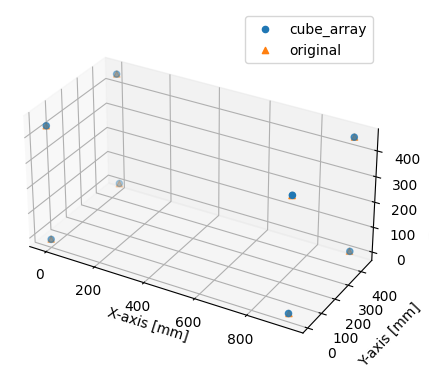

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube_array[:, 0], cube_array[:, 1], cube_array[:, 2], marker='o', label='cube_array')
ax.scatter(cube_3d[:, 0], cube_3d[:, 1], cube_3d[:, 2], marker='^', label='original')
ax.set_xlabel('X-axis [mm]')
ax.set_ylabel('Y-axis [mm]')
ax.set_zlabel('Z-axis [mm]')
ax.legend()
ax.set_aspect('equal')
plt.show()

In [7]:
data_num = 0

camera_name1 = "0"
camera_name2 = "1"
camera_name3 = "2"
camera_name4 = "3"
camera_name5 = "4"

cam1_dir = f"data/hirasaki_{camera_name1}_{data_num}/"
cam2_dir = f"data/hirasaki_{camera_name2}_{data_num}/"
cam3_dir = f"data/hirasaki_{camera_name3}_{data_num}/"
cam4_dir = f"data/hirasaki_{camera_name4}_{data_num}/"
cam5_dir = f"data/hirasaki_{camera_name5}_{data_num}/"

cam1_position = pd.read_csv(os.path.join(cam1_dir, FileName.position_data), index_col="frame")
cam2_position = pd.read_csv(os.path.join(cam2_dir, FileName.position_data), index_col="frame")
cam3_position = pd.read_csv(os.path.join(cam3_dir, FileName.position_data), index_col="frame")
cam4_position = pd.read_csv(os.path.join(cam4_dir, FileName.position_data), index_col="frame")
cam5_position = pd.read_csv(os.path.join(cam5_dir, FileName.position_data), index_col="frame")

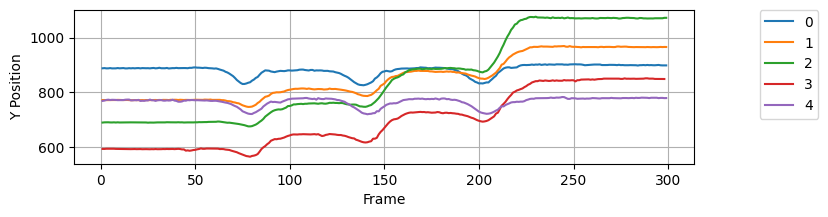

In [8]:
name = "LEFT_ANKLE"

fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(cam1_position.index, cam1_position[f"{name}_y"], label=camera_name1)
ax.plot(cam2_position.index, cam2_position[f"{name}_y"], label=camera_name2)
ax.plot(cam3_position.index, cam3_position[f"{name}_y"], label=camera_name3)
ax.plot(cam4_position.index, cam4_position[f"{name}_y"], label=camera_name4)
ax.plot(cam5_position.index, cam5_position[f"{name}_y"], label=camera_name5)
ax.grid()
ax.set_xlabel('Frame')
ax.set_ylabel('Y Position')
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.show()

In [9]:
df_camera_sync = pd.read_csv("camera_sync.csv")

toe_off_1 = df_camera_sync["toe_off_0"].iloc[data_num]
toe_off_2 = df_camera_sync["toe_off_1"].iloc[data_num]
toe_off_3 = df_camera_sync["toe_off_2"].iloc[data_num]
toe_off_4 = df_camera_sync["toe_off_3"].iloc[data_num]
toe_off_5 = df_camera_sync["toe_off_4"].iloc[data_num]

delay_1 = toe_off_1 - toe_off_1
delay_2 = toe_off_2 - toe_off_1
delay_3 = toe_off_3 - toe_off_1
delay_4 = toe_off_4 - toe_off_1
delay_5 = toe_off_5 - toe_off_1

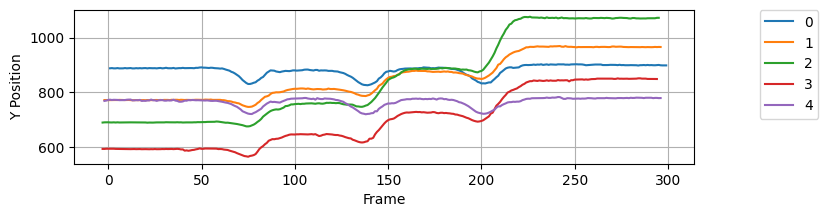

In [10]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(cam1_position.index - delay_1, cam1_position[f"{name}_y"], label=camera_name1)
ax.plot(cam2_position.index - delay_2, cam2_position[f"{name}_y"], label=camera_name2)
ax.plot(cam3_position.index - delay_3, cam3_position[f"{name}_y"], label=camera_name3)
ax.plot(cam4_position.index - delay_4, cam4_position[f"{name}_y"], label=camera_name4)
ax.plot(cam5_position.index - delay_5, cam5_position[f"{name}_y"], label=camera_name5)
ax.grid()
ax.set_xlabel('Frame')
ax.set_ylabel('Y Position')
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.show()

In [11]:
cam1_position["ID"] = cam1_position.index - delay_1
cam2_position["ID"] = cam2_position.index - delay_2
cam3_position["ID"] = cam3_position.index - delay_3
cam4_position["ID"] = cam4_position.index - delay_4
cam5_position["ID"] = cam5_position.index - delay_5

In [12]:
cam1_position = cam1_position.loc[cam1_position["ID"] > 0]
cam2_position = cam2_position.loc[cam2_position["ID"] > 0]
cam3_position = cam3_position.loc[cam3_position["ID"] > 0]
cam4_position = cam4_position.loc[cam4_position["ID"] > 0]
cam5_position = cam5_position.loc[cam5_position["ID"] > 0]

In [13]:
cam1_position.set_index("ID", inplace=True, drop=True)
cam2_position.set_index("ID", inplace=True, drop=True)
cam3_position.set_index("ID", inplace=True, drop=True)
cam4_position.set_index("ID", inplace=True, drop=True)
cam5_position.set_index("ID", inplace=True, drop=True)

In [14]:
min_frame = max(cam1_position.index.min(), cam2_position.index.min(), cam3_position.index.min(), cam4_position.index.min(), cam5_position.index.min())
max_frame = min(cam1_position.index.max(), cam2_position.index.max(), cam3_position.index.max(), cam4_position.index.max(), cam5_position.index.max())
print(min_frame, max_frame)

1.0 294.0


In [15]:
frame = min_frame
cam1_pose = cam1_position.loc[frame].values.reshape(-1, 2)
cam2_pose = cam2_position.loc[frame].values.reshape(-1, 2)
cam3_pose = cam3_position.loc[frame].values.reshape(-1, 2)
cam4_pose = cam4_position.loc[frame].values.reshape(-1, 2)
cam5_pose = cam5_position.loc[frame].values.reshape(-1, 2)
pose = np.array([cam1_pose, cam2_pose, cam3_pose, cam4_pose, cam5_pose], dtype=np.float32)
pose_result = pose_recon_2c(cam, P, pose)

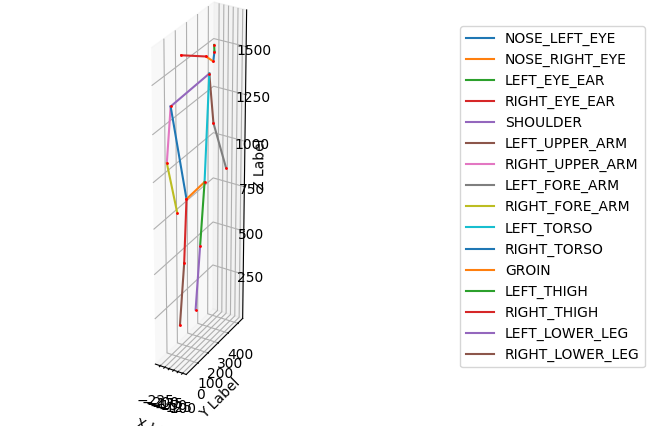

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for key, value in exp_keypoints_connections.items():
    start_idx = value[0]
    end_idx = value[1]
    ax.plot([pose_result[start_idx][0], pose_result[end_idx][0]],
            [pose_result[start_idx][1], pose_result[end_idx][1]],
            [pose_result[start_idx][2], pose_result[end_idx][2]], label=key)
for i in range(len(pose_result)):
    ax.scatter(pose_result[i][0], pose_result[i][1], pose_result[i][2], color='r', s=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
ax.set_aspect('equal')
plt.show()

In [17]:
columns = [f"{kpt}_{xyz}" for kpt in exp_keypoints_list for xyz in ["x", "y", "z"]]
position_df = pd.DataFrame(columns=columns)
position_df.index.name = 'frame'

for frame in range(int(min_frame), int(max_frame) + 1):
    cam1_pose = cam1_position.loc[frame].values.reshape(-1, 2)
    cam2_pose = cam2_position.loc[frame].values.reshape(-1, 2)
    cam3_pose = cam3_position.loc[frame].values.reshape(-1, 2)
    cam4_pose = cam4_position.loc[frame].values.reshape(-1, 2)
    cam5_pose = cam5_position.loc[frame].values.reshape(-1, 2)
    pose = np.array([cam1_pose, cam2_pose, cam3_pose, cam4_pose, cam5_pose], dtype=np.float32)
    pose_result = pose_recon_2c(cam, P, pose)
    position_df.loc[frame] = pose_result.ravel()

position_df

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,LEFT_EAR_x,...,LEFT_KNEE_z,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z
frame,,,,,,,,,,,,,,,,,,,,,
1,-90.772958,161.652378,1544.749324,-101.627584,191.173675,1578.746887,-109.962819,129.129739,1578.507565,-150.608012,...,467.789435,-208.418388,93.872453,469.525281,-241.913653,260.157232,95.968645,-238.214749,100.850372,96.809628
2,-91.411262,161.911524,1545.841036,-100.960488,192.272362,1580.257653,-109.435485,128.507676,1579.579630,-149.753545,...,470.431396,-205.241472,95.548256,471.694293,-241.237532,262.105328,96.440662,-237.594174,102.795116,96.816629
3,-91.087686,161.874141,1546.122952,-100.962963,193.155994,1579.655092,-109.100334,128.622083,1578.989785,-149.384023,...,470.853800,-206.104290,94.093230,472.129985,-240.850655,261.205717,96.479241,-237.248286,101.813765,97.676799
4,-91.644621,162.383182,1545.792407,-101.175006,195.355637,1579.346168,-109.023792,130.082443,1579.046219,-151.225216,...,470.649067,-205.136502,97.485923,471.926555,-239.624854,261.102720,97.185814,-237.254222,102.266671,96.191045
5,-92.076829,162.564654,1546.051007,-102.751148,196.406875,1579.611749,-109.372153,131.995066,1578.953441,-151.626454,...,470.871612,-205.595089,97.202405,471.740234,-240.036804,261.778697,96.431340,-237.976319,101.589640,97.042335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,4134.711114,-66.251657,1537.370950,4115.702475,-62.557777,1566.824492,4132.044578,-82.186892,1566.424894,4052.187452,...,439.971093,4017.851548,-38.264246,441.403279,3967.142973,184.223390,65.927071,3984.933035,0.034734,70.200653
291,4134.437120,-67.295713,1537.634917,4115.011727,-64.874230,1565.696605,4133.164881,-84.557307,1564.649800,4053.186398,...,437.337430,4017.073026,-35.202012,437.880772,3967.490053,184.529219,65.655976,3984.908639,1.497672,69.491955
292,4136.420823,-68.829277,1537.567038,4116.468946,-66.326113,1566.595851,4133.001959,-85.520602,1565.822207,4053.539151,...,440.122794,4018.502392,-35.983407,439.857381,3966.958134,184.272705,67.287382,3985.744672,1.956692,68.977364


In [18]:
plot_3d_motion_exp(position_df/1000, output_name="camera0-4.html")